# Steps

1. Import libraries
2. Import the dataset
3. Perform Data Analysis & EDA
4. Spliting the data
5. [Optional] Data Preprocessing - Feature Scaling,...
6. Choosing a model - Decision Tree Regressor
7. Training the model
8. Testing the model
9. Checking the performance of the model

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Problem statement

# Importing the dataset

Link: https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

# Data Analysis & EDA

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
df.ndim

2

In [7]:
df.shape

(4340, 8)

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [13]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [14]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [23]:
# Create a column new_seller_type and place it at index of the seller_type column
# Replace the values:
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2

x = df.seller_type.replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
df.insert(df.columns.get_loc("seller_type"),'new_seller_type',x)

In [27]:
# Create a column new_fuel and place it at index of the fuel column
# Replace the values:
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4
x = df.fuel.replace({"Petrol":0,"Diesel":1,"CNG":2,"LPG":3,"Electric":4})
df.insert(df.columns.get_loc('fuel'),'new_fuel',x)

In [65]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [66]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [67]:
# Create a column no_of_years = current year - year
df['current_year'] = 2021

In [69]:
df['no_of_years'] = df['current_year'] - df['year']

In [70]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2021,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2021,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2021,9
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2021,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2021,7


In [73]:
# Drop columns - name, year, cureent_year
# Rename selling_price to current_selling_price
df.drop(['name','year','current_year'],axis=1,inplace=True)
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [74]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,14
1,135000,50000,4,1,1,0,14
2,600000,100000,1,1,1,0,9
3,250000,46000,4,1,1,0,4
4,450000,141000,1,1,1,2,7


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int64
 3   seller_type            4340 non-null   int64
 4   transmission           4340 non-null   int64
 5   owner                  4340 non-null   int64
 6   no_of_years            4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [76]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


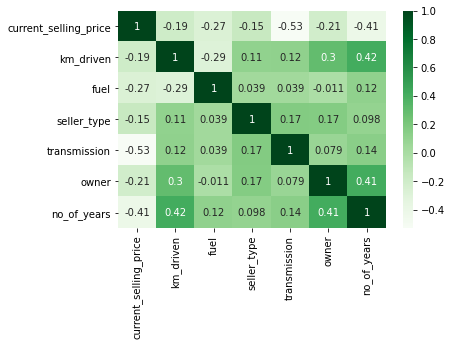

In [77]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

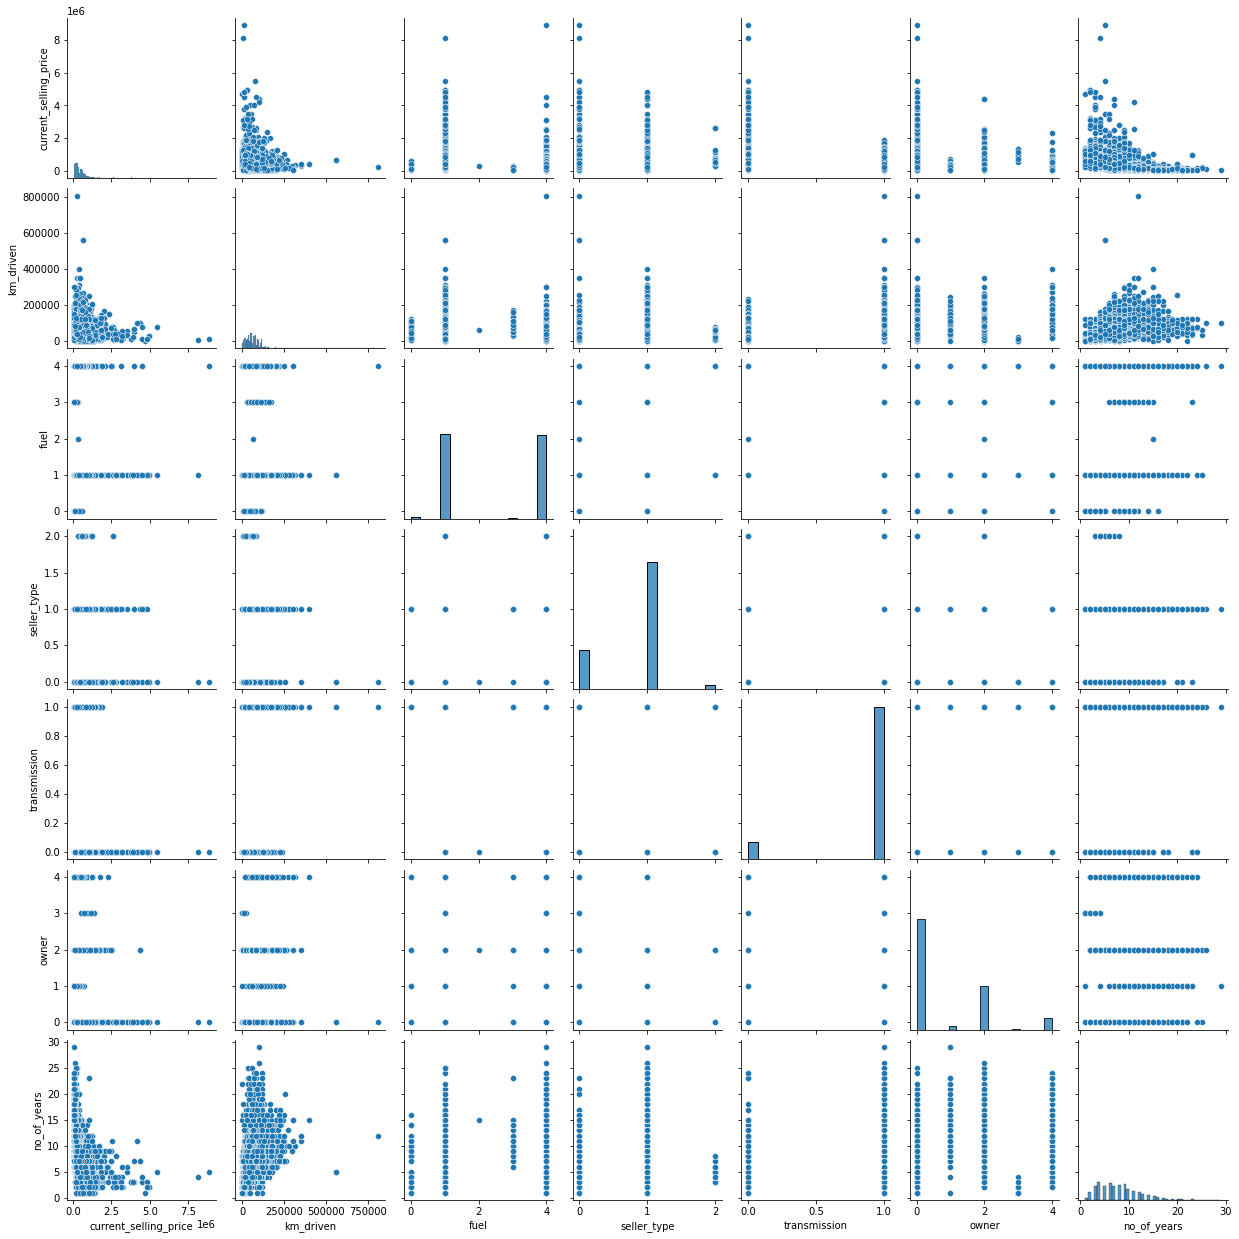

In [78]:
sns.pairplot(df)

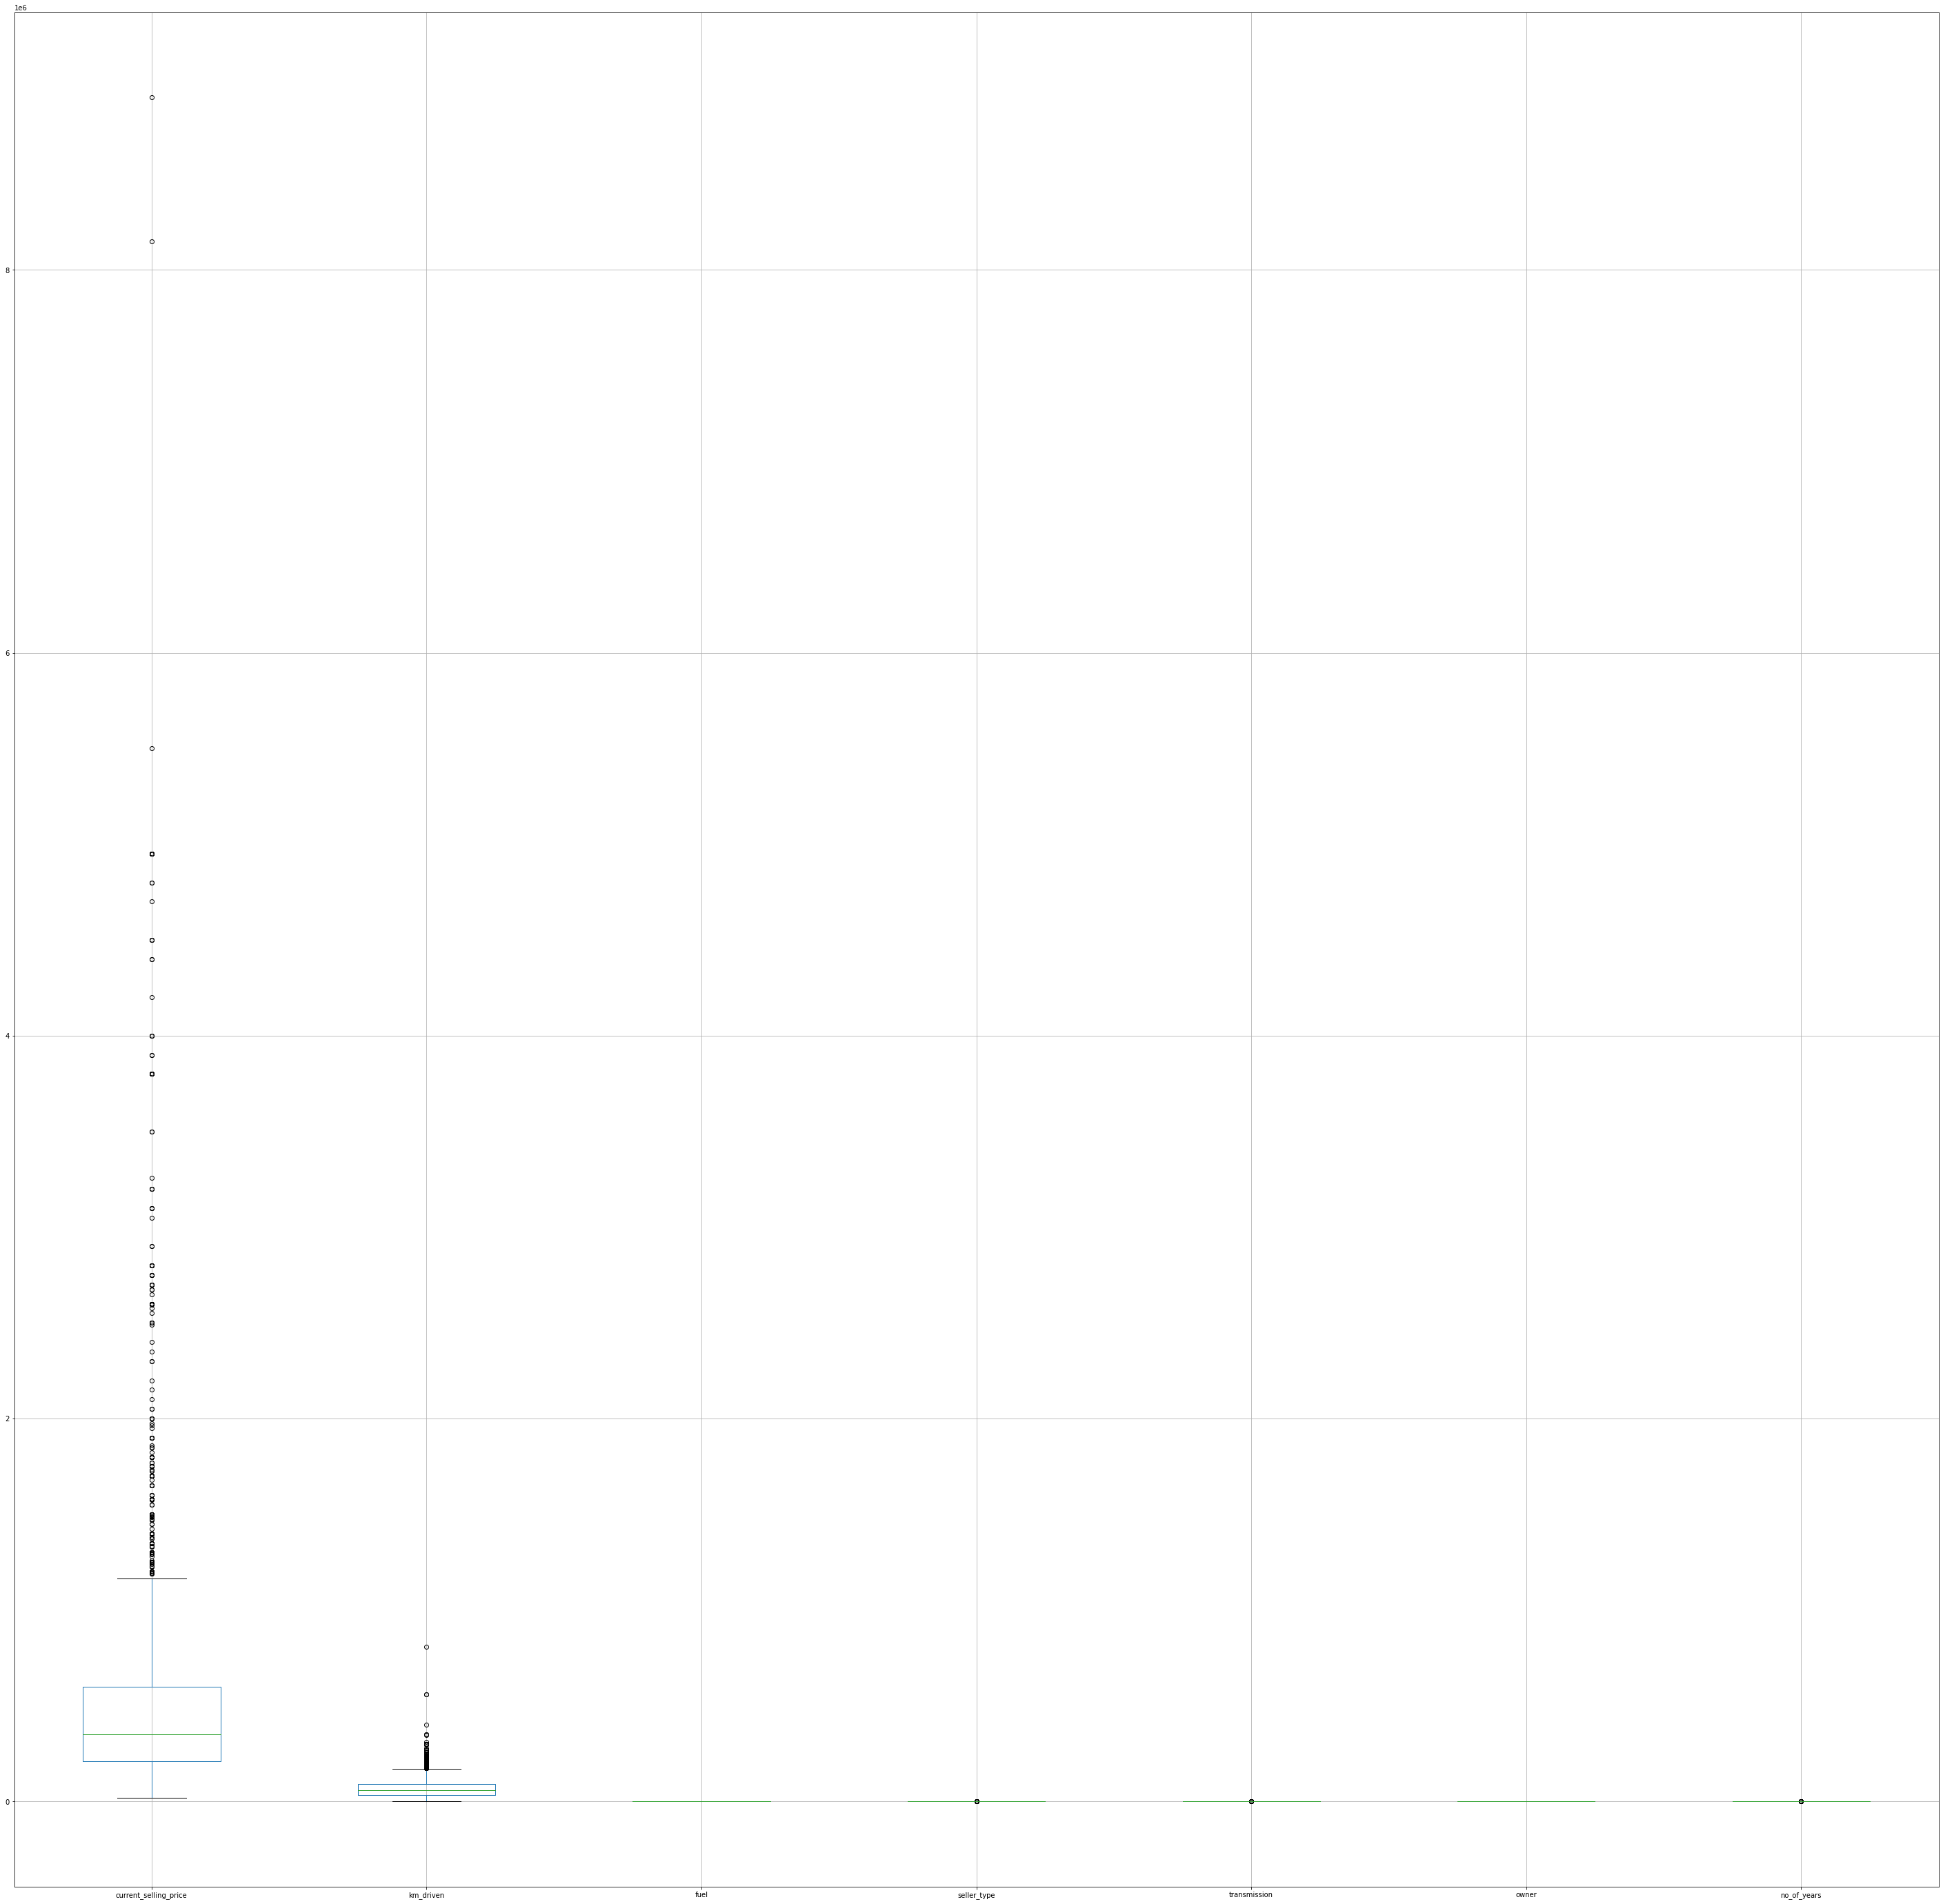

In [82]:
plt.figure(figsize=(50,50))
df.boxplot()

# Select the features and targets

In [86]:
X = np.array(df.drop('current_selling_price',axis=1))
y = np.array(df.current_selling_price)

# Feature Selection
# Feature Scaling

# Spliting the data

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [91]:
len(y_train)

3472

In [ ]:
abcd = [x for i in np.linspace(100,1200,12)]

In [ ]:
param = {
    'ccp_alpha' = abcd
}

# Choosing the model

In [92]:
regressor = DecisionTreeRegressor()

# Training the model

In [93]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [97]:
y_pred = regressor.predict(X_test)

# Testing the model

In [105]:
target = pd.DataFrame({"Actual":y_test.reshape(-1), "Predicted":y_pred.reshape(-1)})

In [109]:
target.head()

,Actual,Predicted
0,840000,840000.0
1,198000,260000.0
2,470000,400000.0
3,535000,535000.0
4,320000,385000.0


# Study the reshape concept and construct a scatter plot that shows the actual and predicted values w.r.t X_test

ValueError: ignored

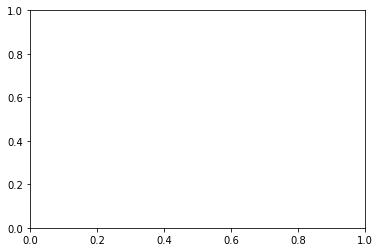

In [108]:
plt.scatter(X_test.reshape(-1),y_test, color='red')
plt.scatter(X_test.reshape(-1),y_pred, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual V/s Predicted')

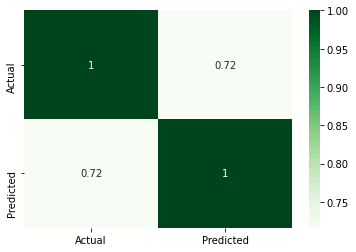

In [110]:
sns.heatmap(target.corr(), annot=True, cmap='Greens')

# Performance


In [111]:
r2_score(y_test,y_pred)

0.45707128108681194

In [57]:
new_df = df.copy()

In [31]:
new_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'new_fuel', 'fuel',
       'new_seller_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [58]:
new_df=new_df[['fuel','seller_type']]

In [59]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [60]:
new_df = pd.get_dummies(new_df)

In [61]:
new_df

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
4335,0,1,0,0,0,0,1,0
4336,0,1,0,0,0,0,1,0
4337,0,0,0,0,1,0,1,0
4338,0,1,0,0,0,0,1,0


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
new_df['fuel'] = LabelEncoder().fit_transform(new_df['fuel'])

In [42]:
new_df['fuel'].unique()

array([4, 1, 0, 3, 2])

In [44]:
new_df.head()

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual


In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [51]:
OneHotEncoder().fit(new_df)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [52]:
new_df

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual
...,...,...
4335,1,Individual
4336,1,Individual
4337,4,Individual
4338,1,Individual


In [55]:
enc_df = pd.DataFrame(enc.fit_transform(new_df[['seller_type']]).toarray())

In [56]:
enc_df

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4335,0.0,1.0,0.0
4336,0.0,1.0,0.0
4337,0.0,1.0,0.0
4338,0.0,1.0,0.0


In [54]:
new_df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)